# An Analysis On Olympic Figure Skating With Public Datasets Provided By BuzzFeedNews

> I used the same datasets but approached the analysis differently to prove that judges have a bias towards competitors from their own nation.
<br>
> Datasets can be found [here](https://github.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/tree/master/data).

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_judge_goe = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/judge-goe.csv')
df_judge_scores = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/judge-scores.csv')
df_judged_aspects = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/judged-aspects.csv')
df_judges = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/judges.csv')
df_performances = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2018-02-olympic-figure-skating-analysis/master/data/performances.csv')


In [6]:
# Join the judged-aspects.csv file to judge-scores.csv only grabbing the columns we need.
df_ja = df_judged_aspects[['aspect_id','performance_id',]]
df_js = df_judge_scores
df_merged = pd.merge(df_ja, df_js, on='aspect_id')

# Join performances.csv to the above dataframe.
df_p = df_performances[['performance_id','program','nation']]
df_merged = pd.merge(df_merged, df_p, on='performance_id')

# Now join judges.csv to the above dataframe. Only grabbing the columns we need.
# Rename the clean_role column to judge to match the judge column in judged-aspects.csv.
df_j = df_judges.rename(columns={'clean_role':'judge'})[['program','judge','judge_country']]
df_merged = pd.merge(df_merged, df_j, on=['program','judge'])
df_merged = df_merged[['judge_country','nation','score']]

# Group the merged dataframe we created by nation and get the mean score per nation.
# Note: kept the original merged dataframe in tact so we can use it below for a different grouping.
df_nation_mean = df_merged.groupby(['nation']).mean().reset_index()
df_nation_mean = df_nation_mean.rename(columns={'score':'mean_score_all_judges'})

# Group the merged dataframe we created by both nation and judge_country to get the mean score for each nation/judge_country.
df_nation_judge_mean = df_merged.groupby(['nation','judge_country']).mean().reset_index()
df_nation_judge_mean = df_nation_judge_mean.rename(columns={'score':'mean_score_only_nation_judges'})

# I only want to see the mean score where the judges country is the same as the nation.
df_nation_judge_mean = df_nation_judge_mean[df_nation_judge_mean['nation'] == df_nation_judge_mean['judge_country']]
# Since the columns are equal, I can remove one. I removed judge_country and kept nation.
del df_nation_judge_mean['judge_country']

# Merge the twodifferent goupings together so we can compare the two means next to each other.
df_merged = pd.merge(df_nation_mean,df_nation_judge_mean, on='nation')

# Create a column that shows how much more or how much less the judge favors players from his own country.
df_merged['delta'] = df_merged['mean_score_only_nation_judges'] - df_merged['mean_score_all_judges']

# Print the final output.
df_merged

,nation,mean_score_all_judges,mean_score_only_nation_judges,delta
0,AUS,2.834116,3.489583,0.655468
1,BEL,3.263410,2.720588,-0.542822
2,CAN,4.089152,4.642086,0.552934
3,CHN,3.547158,3.990244,0.443086
4,CZE,3.161031,2.892857,-0.268173
5,ESP,4.026094,4.118421,0.092327
6,FRA,3.676721,3.906863,0.230142
7,GER,3.305258,3.907692,0.602434
8,HUN,2.044061,3.041667,0.997605
9,ISR,3.008030,3.122596,0.114567


In [7]:
# We can see that most judges will have a bias towards their own country.
# From this dataset, on avaerge a judge will give his/her country 0.42 more points than to other countries.
df_merged['delta'].mean()

0.42353153983233793

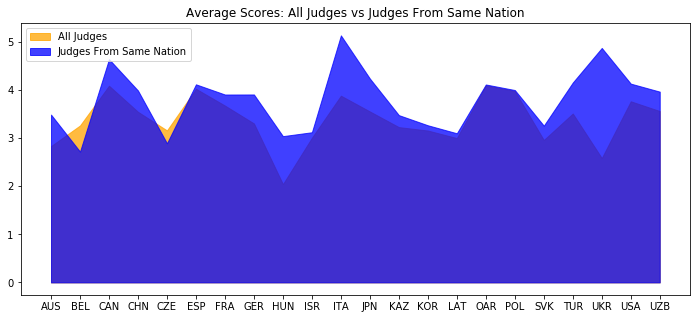

In [348]:
# A quick little chart to vizualize these findings. We can clearly see that judges have a bias towards their own nation.

# Set nation to the index column to use it as the range for my plot.
df_merged = df_merged.set_index('nation')

# Start a new figure.
plt.figure(figsize=(12,5))

# Plot two plots ontop of each other on the same figure.
plt.fill_between(df_merged.index, df_merged['mean_score_all_judges'],color="orange",alpha=0.75,label='All Judges')
plt.fill_between(df_merged.index, df_merged['mean_score_only_nation_judges'],color="blue",alpha=0.75,label='Judges From Same Nation')


plt.title('Average Scores: All Judges vs Judges From Same Nation')
plt.legend(loc='upper left')
plt.show()